In [4]:
# !pip install opencv-python

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
from statistics import median,mode

In [ ]:
img_1 = mpimg.imread('p1.tif')
img_2 = mpimg.imread('p2.tif')

In [7]:
def his_cal(img1,m,n):
  r = []
  final_hist = {}
  r = np.array(r)
  k = range(256)

  for i in range(m):
    for j in range(n):
      if img1[i][j] in k:
        r = np.append(r,img1[i][j])

  for i in r:
    if i not in final_hist.keys():
      final_hist[i] = 1
    else:
      final_hist[i] = final_hist[i] + 1

  final_hist2 = {k:(v/(m*n)) for (k,v) in final_hist.items()}

  return final_hist2

In [8]:
def hist_equi(final_hist2):
  ks=sorted(final_hist2.keys())
  s = {}
  sum = 0
  for k in ks:
    val=final_hist2[k]
    sum = sum + val
    s[k] = round(255*sum)

  return s

In [9]:
def recreate_img(s,img1,m,n,final_hist2):
  x = img1
  temp = 0
  img12 = [[0 for c in range(m)] for r in range(n)]
  for i in range(m):
      for j in range(n):
        temp = img1[i][j]
        img12[i][j] = s[temp]

  v = his_cal(img12,m,n)
  # plt.figure(figsize=[25, 16])
  # plt.subplot(3,2,1)
  # plt.imshow(x,cmap="gray")
  # plt.axis('off')
  # plt.subplot(3,2,2)
  # plt.imshow(img12,cmap="gray")
  # plt.axis('off')
  plt.figure(figsize=[25,16])
  plt.subplot(2,2,2)
  plt.stem(final_hist2.keys(),final_hist2.values())
  plt.xticks(range(0,256,20))
  plt.xlabel('intensity value')
  plt.ylabel('number of pixels')
  plt.title('Normalized Histogram of the original image')
  plt.subplot(2,2,3)
  plt.stem(v.keys(),v.values())
  plt.xticks(range(0,256,20))
  plt.xlabel('intensity value')
  plt.ylabel('number of pixels')
  plt.title('Equlized Histogram of the image')
  plt.subplot(2,2,1)
  plt.stem(s.keys(),s.values())
  plt.xticks(range(0,256,20))
  plt.xlabel('original intensity')
  plt.ylabel('transformed intensity')
  plt.title('Equlized Histogram of the image')
  plt.subplot(2,2,4)
  plt.imshow(img12,cmap="gray")
  plt.axis('off')
  plt.show()
  
  return img12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

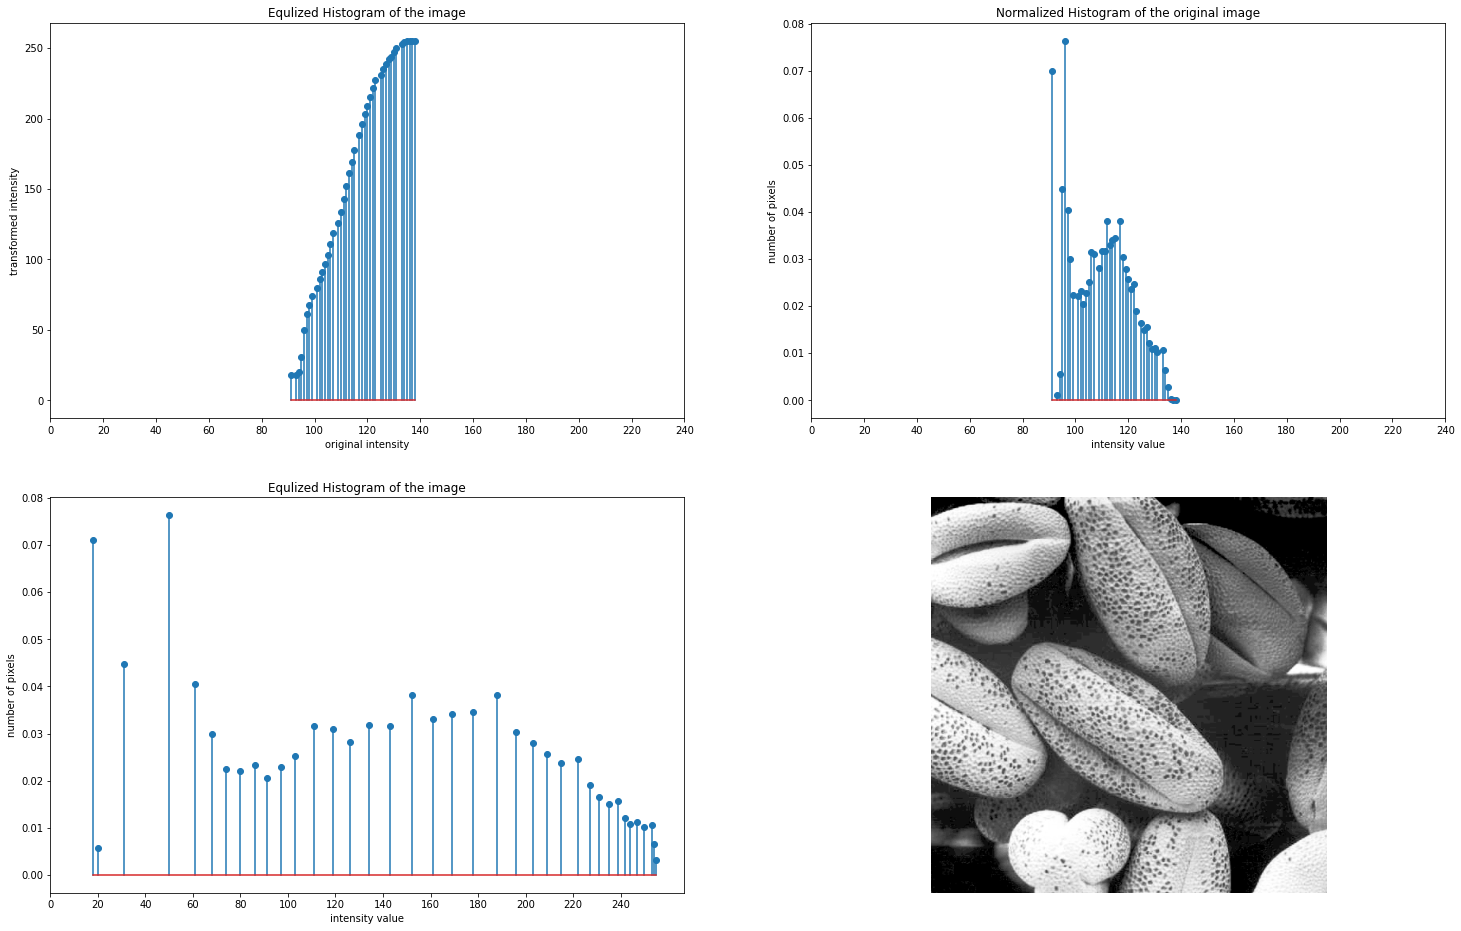

In [10]:
m,n = img_1.shape
img12 = [[0 for c in range(m)] for r in range(n)]
final_hist2 = his_cal(img_1,m,n)
s = hist_equi(final_hist2)
img12 = recreate_img(s,img_1,m,n,final_hist2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

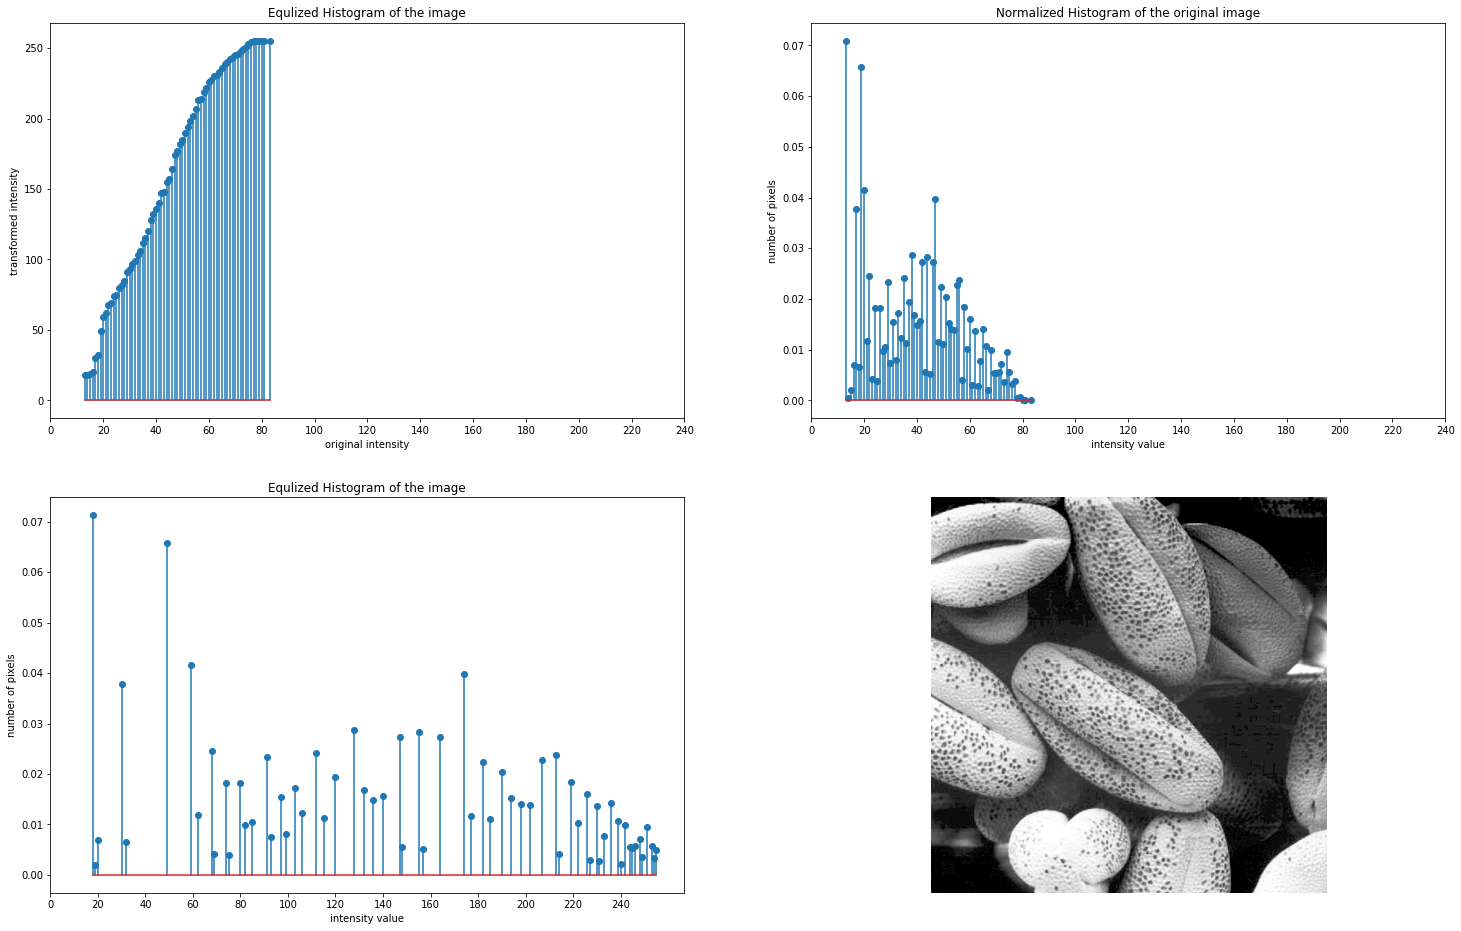

In [11]:
m,n = img_2.shape
img22 = [[0 for c in range(m)] for r in range(n)]
final_hist22 = his_cal(img_2,m,n)
s2 = hist_equi(final_hist22)
img22 = recreate_img(s2,img_2,m,n,final_hist22)